# Quality Inspection of the Workpiece

## CS5102 - DIP Project

Group: 29 <br>
Authors: <br>
 Deep Patel, ME21D0004 <br>
 Radhika Mittal, CED19I050 <br>
 Yash Kumar Sahu, CED19I039 

## Problem statement

## Libraries

In [1]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math
import cmath
from PIL import Image, ImageOps

### Reading Input Grayscale Image

No. of Images =  8


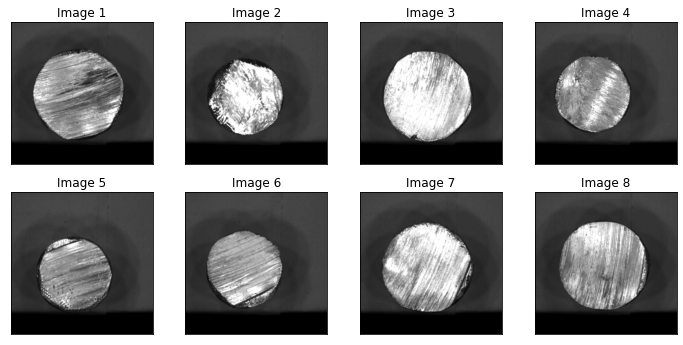

In [29]:
#Reading input image
#Input list of images from path

#images = [cv2.imread(file,0) for file in glob.glob("/home/yash/files/git/CS5102-Digital-Image-Processing-Courseworks/Project/dataset/*.BMP")]
images = [Image.open(file) for file in glob.glob("/home/yash/files/git/CS5102-Digital-Image-Processing-Courseworks/Project/dataset/*.BMP")]
print("No. of Images = ", len(images))

gray_images=[]
new_width=500
new_height=500

plt.rcParams["figure.figsize"]=12,12
for i in range(len(images)):
    im=images[i]
    width, height = im.size  # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    im=ImageOps.grayscale(im)
    im=np.array(im)
    gray_images.append(im)
    
    
for i in range(len(gray_images)):    
    plt.subplot(4,4,i+1),plt.imshow(gray_images[i],'gray')
    plt.title("Image "+str(i+1))
    plt.xticks([]),plt.yticks([])
plt.show()

In [30]:
img=gray_images[6]

### Thresholding

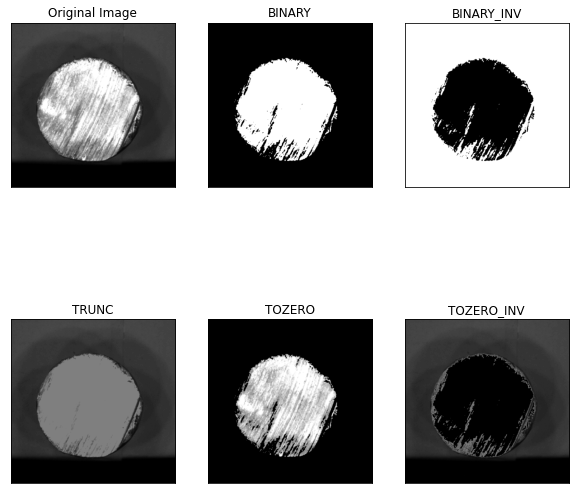

In [9]:
## Simple Thresholding

# For every pixel, the same threshold value is applied. 
# If the pixel value is smaller than the threshold, it is set to 0, 
# otherwise it is set to a maximum value. The function cv.threshold 
# is used to apply the thresholding. The first argument is the source image, 
# which should be a grayscale image. The second argument is the threshold 
# value which is used to classify the pixel values. The third argument is 
# the maximum value which is assigned to pixel values exceeding the threshold.

plt.rcParams["figure.figsize"]=10,10
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
thresh_images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(thresh_images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

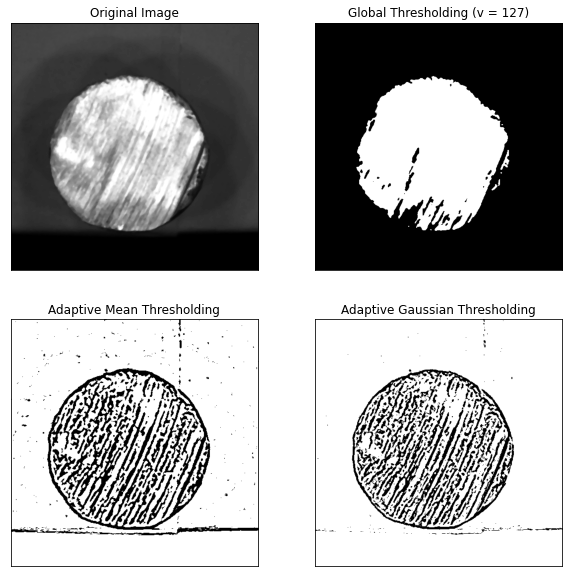

In [13]:
## Adaptive Thresholding

# In the previous section, we used one global value as a threshold. 
# But this might not be good in all cases, e.g. if an image has different 
# lighting conditions in different areas. In that case, 
# adaptive thresholding can help. Here, the algorithm determines the 
# threshold for a pixel based on a small region around it. 
# So we get different thresholds for different regions of the same image 
# which gives better results for images with varying illumination.

# The adaptiveMethod decides how the threshold value is calculated:
## cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
## cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

# The blockSize determines the size of the neighbourhood area and C is a 
# constant that is subtracted from the mean or weighted sum of the 
# neighbourhood pixels.

img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
aThresh_images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(aThresh_images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


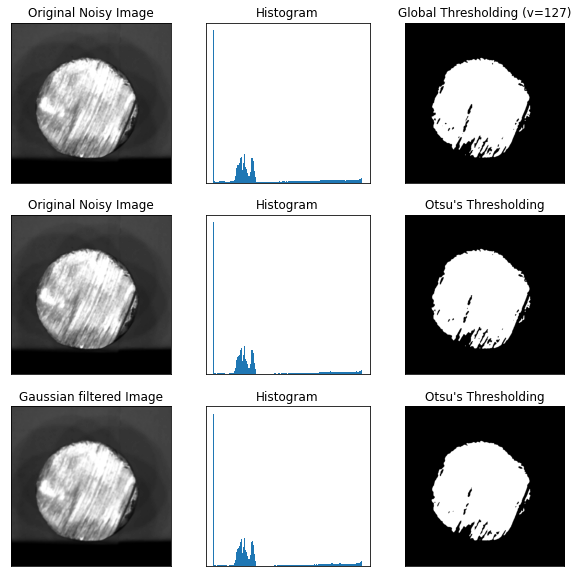

In [16]:
## Otsu's Binarization

# In global thresholding, we used an arbitrary chosen value as a threshold. 
# In contrast, Otsu's method avoids having to choose a value and determines 
# it automatically.

# Consider an image with only two distinct image values (bimodal image), 
# where the histogram would only consist of two peaks. A good threshold 
# would be in the middle of those two values. Similarly, Otsu's method 
# determines an optimal global threshold value from the image histogram.

# In order to do so, the cv.threshold() function is used, 
# where cv.THRESH_OTSU is passed as an extra flag. The threshold value can 
# be chosen arbitrary. The algorithm then finds the optimal threshold value 
# which is returned as the first output.

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
oThresh_images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding",'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(oThresh_images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(oThresh_images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(oThresh_images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


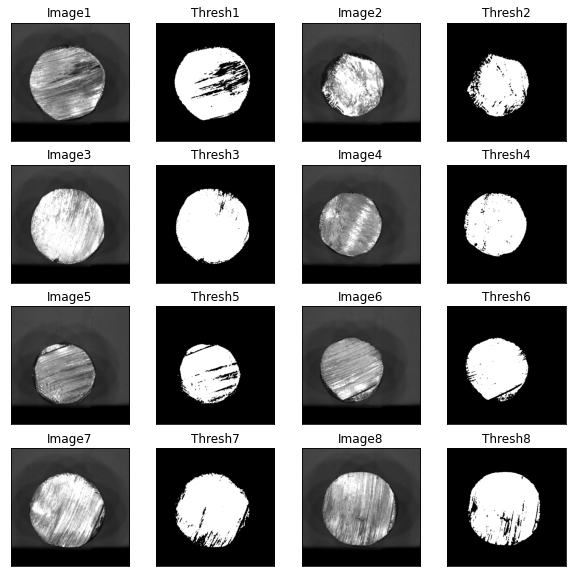

In [27]:
## Otsu's Thresholding on all images

grayThresh=[]

for i in range(len(gray_images)):    
    img=gray_images[i]
    # Otsu's thresholding
    ret,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    grayThresh.append(th)
    plt.subplot(4,4,i*2+1),plt.imshow(img,'gray')
    plt.title("Image"+str(i+1)), plt.xticks([]), plt.yticks([])
    plt.subplot(4,4,i*2+2),plt.imshow(th,'gray')
    plt.title("Thresh"+str(i+1)), plt.xticks([]), plt.yticks([])
plt.show()

## References

Gonzalez, Rafael C. and Woods, Richard E.. Digital image processing. Upper Saddle River, N.J.: Prentice Hall, 2008